# Intervalos de confiança

Parte 1: Cálculo dos Intervalos (O Mundo Ideal vs. O Mundo Real)
Este bloco de código calcula os limites exatos para o exemplo do iPhone.

In [1]:
# --- CONFIGURAÇÃO DOS DADOS (O Cenário) ---
media_amostral <- 584      # x-barra
desvio_padrao  <- 22       # s (amostral)
n              <- 11       # tamanho da amostra
confianca      <- 0.95     # Nível de confiança (95%)
alpha          <- 1 - confianca

# --- CÁLCULO 1: O "Mundo Ideal" (Se conhecêssemos o Sigma populacional) ---
# Usamos a Distribuição Normal (Z)
z_critico <- qnorm(1 - alpha/2) # Aprox. 1.96
margem_erro_z <- z_critico * (desvio_padrao / sqrt(n))

ic_z_inferior <- media_amostral - margem_erro_z
ic_z_superior <- media_amostral + margem_erro_z

# --- CÁLCULO 2: O "Mundo Real" (Sigma desconhecido) ---
# Usamos a Distribuição t de Student
graus_liberdade <- n - 1
t_critico <- qt(1 - alpha/2, df = graus_liberdade) # Aprox. 2.228
margem_erro_t <- t_critico * (desvio_padrao / sqrt(n))

ic_t_inferior <- media_amostral - margem_erro_t
ic_t_superior <- media_amostral + margem_erro_t

# --- EXIBINDO OS RESULTADOS ---
cat("=== RESULTADOS PARA O EXEMPLO DO IPHONE ===\n")
cat(sprintf("Média: $%d | Desvio: $%d | N: %d\n\n", media_amostral, desvio_padrao, n))

cat("1. Cenário Z (Incorreto/Didático): Ignorando a incerteza do desvio padrão\n")
cat(sprintf("   Valor Crítico Z: %.3f\n", z_critico))
cat(sprintf("   Margem de Erro:  %.2f\n", margem_erro_z))
cat(sprintf("   Intervalo Z:     [%.2f, %.2f]\n\n", ic_z_inferior, ic_z_superior))

cat("2. Cenário t (Correto): Compensando a incerteza com Student\n")
cat(sprintf("   Valor Crítico t: %.3f (maior que Z!)\n", t_critico))
cat(sprintf("   Margem de Erro:  %.2f (mais larga)\n", margem_erro_t))
cat(sprintf("   Intervalo t:     [%.2f, %.2f]\n", ic_t_inferior, ic_t_superior))

=== RESULTADOS PARA O EXEMPLO DO IPHONE ===
Média: $584 | Desvio: $22 | N: 11

1. Cenário Z (Incorreto/Didático): Ignorando a incerteza do desvio padrão
   Valor Crítico Z: 1.960
   Margem de Erro:  13.00
   Intervalo Z:     [571.00, 597.00]

2. Cenário t (Correto): Compensando a incerteza com Student
   Valor Crítico t: 2.228 (maior que Z!)
   Margem de Erro:  14.78 (mais larga)
   Intervalo t:     [569.22, 598.78]


Parte 2: Visualização Gráfica (Z vs. t de Student)
Este código gera um gráfico que mostra visualmente por que o intervalo t é mais "largo". Ele exibe as "caudas gordas" da distribuição t em comparação com a Normal.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


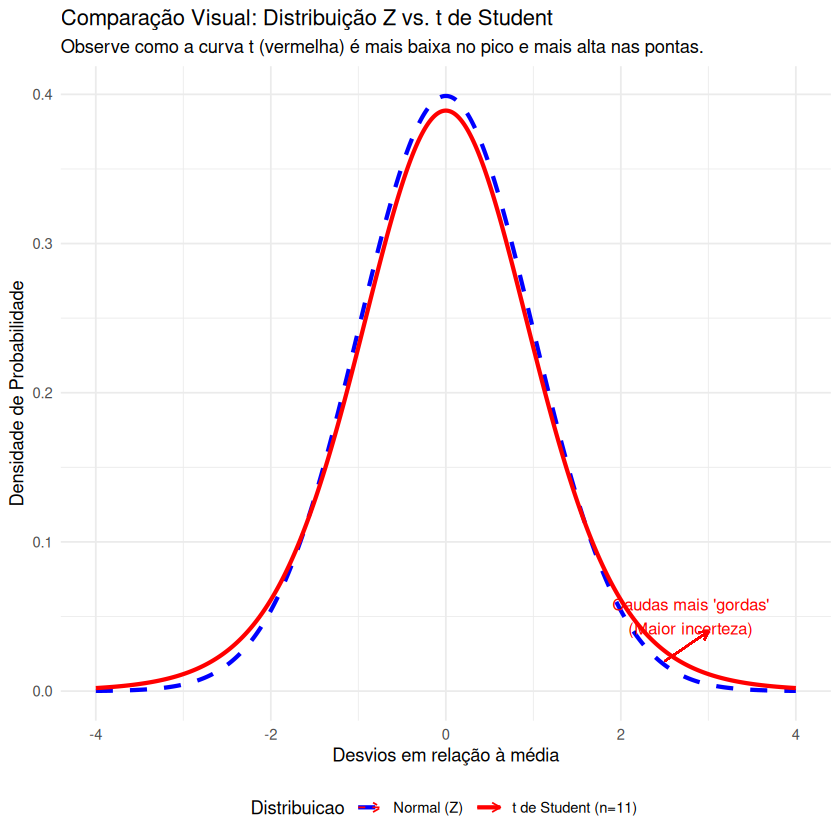

In [2]:
# Carregando biblioteca gráfica (se não tiver, instale com install.packages("ggplot2"))
library(ggplot2)

# Criando uma sequência de valores para o eixo X (desvios padrão)
x_vals <- seq(-4, 4, length.out = 1000)

# Gerando dados para a Normal (Z) e para a t de Student (com gl=10)
dados <- data.frame(
  x = rep(x_vals, 2),
  densidade = c(dnorm(x_vals), dt(x_vals, df = 10)),
  Distribuicao = rep(c("Normal (Z)", "t de Student (n=11)"), each = 1000)
)

# Plotando
ggplot(dados, aes(x = x, y = densidade, color = Distribuicao, linetype = Distribuicao)) +
  geom_line(size = 1.2) +
  
  # Cores e Estilo
  scale_color_manual(values = c("Normal (Z)" = "blue", "t de Student (n=11)" = "red")) +
  scale_linetype_manual(values = c("Normal (Z)" = "dashed", "t de Student (n=11)" = "solid")) +
  
  # Destaque para as caudas (onde a diferença importa)
  annotate("text", x = 2.8, y = 0.05, label = "Caudas mais 'gordas'\n(Maior incerteza)", color = "red", size = 3.5) +
  geom_segment(aes(x = 2.5, y = 0.02, xend = 3, yend = 0.04), arrow = arrow(length = unit(0.2, "cm")), color="red") +

  # Títulos e Eixos
  labs(title = "Comparação Visual: Distribuição Z vs. t de Student",
       subtitle = "Observe como a curva t (vermelha) é mais baixa no pico e mais alta nas pontas.",
       x = "Desvios em relação à média",
       y = "Densidade de Probabilidade") +
  
  theme_minimal() +
  theme(legend.position = "bottom")

A linha vermelha diz que eventos extremos são considerados mais prováveis quando temos poucos dados, o que nos obriga a abrir mais o nosso intervalo de confiança para manter a segurança de 95%.

O qt vs qnorm: o comando qnorm(0.975) sempre devolve 1.96. Porém, o qt(0.975, df=10) devolve 2.228. Essa diferença matemática é o "preço" que pagamos por não conhecer o desvio padrão real da população,.